## Исследование данных о российском кинопрокате



### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data1 = pd.read_csv('datasets/mkrf_movies.csv')
data2 = pd.read_csv('datasets/mkrf_shows.csv')

In [3]:
print(data1.info())
data1.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [4]:
print(len(data1[data1['puNumber']=='нет']))
data1 = data1.drop(data1[(data1['puNumber']=='нет')].index)
data1['puNumber'] = data1['puNumber'].astype('int')
data1.info()

1
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int32  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes:

В таблице только в одной строке значение ‘puNumber’ равно ‘нет’. Поэтому стоит удалить эту строку и заменить тип на integer, чтобы объединить два датафрейма.

In [5]:
print(data2.info())
data2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB
None


,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08


In [6]:
data = data1.merge(data2, on='puNumber', how='left')

In [7]:
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int32  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


In [8]:
data[data['box_office'].notnull()].shape[0]

3158

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int32  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

In [10]:
# format time
data['show_start_date'] = pd.to_datetime(data['show_start_date'], format='%Y-%m-%dT%H:%M:%S.%fZ')

In [11]:
# remove percentage  from ratings
data['ratings'] = data['ratings'].str.replace('%', '')
data['ratings'] = data['ratings'].astype('float')
data['ratings'] = data.apply(
    lambda row: row['ratings'] / 10 if row['ratings']>10 else row['ratings'],
    axis=1
)

В некоторых строках указаны проценты. Их необходимо убрать. Поменять тип на float.

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

In [12]:
print(data.isna().sum())

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7153
nonrefundable_support    7153
budget                   7153
financing_source         7153
ratings                   966
genres                    975
box_office               4327
dtype: int64


In [13]:
old_data_size = data.shape[0]
data = data.drop(data[data['film_studio'].isna()].index)
data = data.drop(data[data['production_country'].isna()].index)
data = data.drop(data[data['director'].isna()].index)

median_value=data['ratings'].median()
data['ratings'].fillna(value=median_value, inplace=True)

data['genres'] = data['genres'].fillna("")
data['refundable_support'] = data['refundable_support'].fillna(0)
data['nonrefundable_support'] = data['nonrefundable_support'].fillna(0)
data['budget'] = data['budget'].fillna(0)
data['budget'] = data.apply(
    lambda row: row['nonrefundable_support'] + row['refundable_support'] if row['budget']==0 else row['budget'],
    axis=1
)

- Слишком много пропущенных значений в 'refundable_support', 'nonrefundable_support', 'budget', 'financing_source', 'box_office'. Чтобы заполнить пропуски средним значением или медианой, данных недостаточно. Поэтому их лучше оставить так как есть или заполнить нулями.

- Пропуски в 'ratings' можно заполнить с помощью медианы. 

- Строки с пропущенными значениями в 'film_studio', 'production_country', 'director' можно удалить, т.к. из не так много.

- Нельзя точно угадать продюсера и жанр фильма, поэтому стоит оставить как есть.

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

In [14]:
print(data[data.duplicated()])

Empty DataFrame
Columns: [title, puNumber, show_start_date, type, film_studio, production_country, director, producer, age_restriction, refundable_support, nonrefundable_support, budget, financing_source, ratings, genres, box_office]
Index: []


В данных отсутствуют явные дубликаты.

In [15]:
data['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

В столбце 'type' присутствуют неявные дубликаты (например, 'Художественный' и ' Художественный'). 

In [16]:
for a in data['director'].unique():
    print(a)

Кевин Костнер
Е.Матвеев
Тимур Бекмамбетов
В.Абдрашитов
В.Меньшов
Джон Туртурро
Эрик Беснард
В.Титов
Пол Грингросс
М.Туманишвили
Клинт Иствуд
Фернанду Мейрелльеш
Майк Фиггис
А.Салтыков
Г.Данелия
А.Смирнов
Ю.Чулюкин
В.Краснопольский, В.Усков
М.Чиаурели
Лассе Халлстрем
Л.Гайдай
В.Чеботарев
В.Азаров
Боривой Земан
Эндрю Никкол
Г.Мыльников
Джонатан Кинг
И.Бабич
Даниэль Робишо
Грегори Хоблит
Крис Нунан
Стивен Фрирз
Йэн Софтли
Найл Джонсон
Р.Быков
Роб Райнер
Бен Янгер
Роб Маршалл
Е.Ташков
Н.Михалков
Ю.Карасик
А.Тарковский
Джон Франкенхаймер
Оливье Маршал
С.Соловьев
Иоахим Реннинг, Эспен Сандберг
Ролан Быков
Семен Туманов
Питер Сигал
М.Ромм
Г.Полока
Ю.Райзман
Дрю Дэйуолт, Дэвид Шнейдер
С.Самсонов
Айрон Блейз, Роберт Уокер
К.Шахназаров
И.Гостев
Т.Лукашевич
В.Павлович
Эмиль Лотяну
Тиль Швайгер
А.Птушко
Г.Натансон
И.Пырьев, М.Ульянов, К.Лавров
Джеймс Айвори
И.Пырьев
К.Юдин, Б.Барнет
С.Бондарчук
В.Георгиев
В.Басов
А.Сурикова
Майк Слии
Томми О'Хавер
А.Эфрос
М.Микаэлян
А.Серый
Дин Хэмилтон
Г.Панфилов

In [17]:
for a in data['producer'].unique():
    print(a)

Дэвид Валдес, Кевин Костнер, Джейк Эбертс
nan
Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит
Джон Пенотти, Джон Туртурро
Патрис Леду
Патрик Кроули, Фрэнк Маршалл, Пол Сэндберг
Клинт Иствуд, Том Розенберг, Альберт С.Рудди, Пол Хаггис
Саймон Чэннинг Уильямс
Этчи Стро, Анни Стюарт, Майк Фиггис
Лесли Холлеран, Алан Лэдд мл., Келлиан Лэдд, Харви Вайнстайн
Норман Голуайтли, Энди Грош, Николас Кейдж, Эндрю Никкол, Крис Робертс, Филипп Русле
Филиппа Кемпбелл
Луис Дюкью
Чарльз Уэйнсток
Дэвид Киршнер, Майк Медэвой, Арнольд Мессер, Корей Сэйнья, Дэвид Твайтс
Норма Хейман, Боб Хоскинс
Лоуренс Гордон, Роберт Коулсберри, Ллойд Левин
Мэтью Пэйн, Джулия Пэло
Тодд Блэк, Элан Грейсман, Джереми Левен, Роб Райнер, Эли Самаха
Дженнифер Тодд, Сюзанн Тодд, Брэдли Дженкел, Энтони Катагас
Стивен Спилберг, Люси Фишер, Дуглас Уик, Джон Де Люка, Гэри Барбер, Роджер Бирнбаум
Франк Шоро, Сирил Кольбьё-Жюстен, Жан-Баптист Дюпон
Люк Бессон, Ариель Зейтун
Бини Барнс, Джозеф Дрэйк, Джон Линсон
Джон Балдеччи, Лоуренс

Летти Аронсон, Люси Дарвин, Гарет Уайли
Кристофер Алендер, Роксанна Бенжамин
Г.Евтушенко
Сэм Мэйдью, Дэвид Мимран, Джордан Шур
Джеймс Каллен Брэссак
Мелита Тоскан дю Плантье, Мари-Жанна Паскаль
Расселл Страйнер, Карл Хардман
Родриго Эрранс, Стефани Бошеф, Томас Бода
Ингвильд Эвьемо, Пер Арнштейн Аамот, Ове Хайборг
Ален Аттал, Жером Сейду
Тигран Амбарцумян
Келвин Манро, Тимоти Уайт
Армандо Гутьеррез
Кристофер Алендер, Дэвид Гроув Черчиль Вист 
Оскар Генерале, Джефф Эллиотт
Лиз-Мари Амар
Л.Шнайдерман, Л.Садилова
К.Михайлова, К.Фам
Адам Болинг, Дэвид Рейд, Дэвид Ферниш
В.Кречетова, С.Осипьян, С.Штерн, Д.Горелик, П.Лунгин, Е.Панфилов
В.Микова
Г.Добрыгин
Алекс Гарсиа, Джон Джашни, Мэри Пэрент, Брайан Роджерс, Томас Талл
Синди Райс, Джереми М.Розен, Джон Фрэнк Розенблюм
Оливье Дельбоск, Эмильен Биньон, Кристин де Жекель
Стивен Номура Шибле
В.Козлов
Тони Стивенс, Джона Стро, Джейсон Маккензи, Нина Контрерас
С.Корнихин, В.Федорович, Е.Никишов, П.Лилиенфельд, ООО "1-2-3 Продакшн"
В.Кузовлев, М.

Та же самая ошибка присутствует в столбцах 'director' и 'producer' (например, 'И.Гелашвили' и ' И.Гелашвили', 'Ф.Бондарчук' и ' Ф.Бондарчук').

Возможная причина указанных выше дубликатов может быть ошибка при вводе данных.

In [18]:
data['production_country'] = data['production_country'].str.replace(';', '')
data['director'] = data['director'].str.lstrip()
data['producer'] = data['producer'].str.lstrip()
print(len(data[data.duplicated()]))
#data = data.drop_duplicates()

0


#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

In [19]:
def type_to_numeric(x):
        if x=='Художественный': return 0
        if x=='Анимационный':   return 1
        if x=='Прочие': return 2
        if x=='Документальный':   return 3
        if x=='Научно-популярный': return 4
        if x=='Музыкально-развлекательный':   return 5

def age_to_numeric(x):
        if x=='«18+» - запрещено для детей': return 4
        if x=='«6+» - для детей старше 6 лет':   return 1
        if x=='«12+» - для детей старше 12 лет': return 2
        if x=='«16+» - для детей старше 16 лет':   return 3
        if x=='«0+» - для любой зрительской аудитории': return 0
        
data['type'] = data['type'].str.strip()
data['type'] = data['type'].apply(type_to_numeric)
data['age_restriction'] = data['age_restriction'].apply(age_to_numeric)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7458 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7458 non-null   object        
 1   puNumber               7458 non-null   int32         
 2   show_start_date        7458 non-null   datetime64[ns]
 3   type                   7458 non-null   int64         
 4   film_studio            7458 non-null   object        
 5   production_country     7458 non-null   object        
 6   director               7458 non-null   object        
 7   producer               6894 non-null   object        
 8   age_restriction        7458 non-null   int64         
 9   refundable_support     7458 non-null   float64       
 10  nonrefundable_support  7458 non-null   float64       
 11  budget                 7458 non-null   float64       
 12  financing_source       332 non-null    object        
 13  rat

In [20]:
data['genres'].unique()

array(['боевик,драма,мелодрама', 'драма,военный',
       'фантастика,боевик,триллер', 'драма', 'мелодрама,комедия',
       'мюзикл,мелодрама,комедия', 'комедия,криминал',
       'боевик,триллер,детектив', 'боевик,драма,приключения',
       'драма,спорт', 'триллер,драма,мелодрама', 'комедия,мелодрама',
       'драма,мелодрама,комедия', 'драма,мелодрама', 'драма,история',
       'драма,мелодрама,семейный', 'комедия,мелодрама,криминал',
       'комедия', 'боевик,драма,криминал', 'драма,комедия',
       'ужасы,фантастика,комедия', 'мультфильм,короткометражка,мелодрама',
       'драма,криминал', 'мультфильм,фантастика,фэнтези',
       'триллер,драма,криминал', 'драма,мелодрама,биография',
       'драма,комедия,военный', 'фантастика,драма,детектив',
       'мюзикл,семейный', '', 'военный,приключения,драма',
       'документальный,драма', 'драма,биография,история',
       'боевик,триллер,драма', 'фэнтези,боевик',
       'боевик,комедия,криминал', 'мюзикл,комедия,детский',
       'комедия,мело

- Почти во всех категориальных столбцах тип значения - object. Строки занимают много места, и замедляют вычисления.

- Почти во всех категориальных столбцах (особенно в 'genres') указан лист значений. Можно создать новые столбцы и выделить основной жанр, чтобы упростить процесс исследования.

#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

count    3.320000e+02
mean     1.314224e+08
std      1.871482e+08
min      6.000000e+06
25%      4.552480e+07
50%      7.119690e+07
75%      1.500000e+08
max      2.305074e+09
Name: budget, dtype: float64


<Axes: >

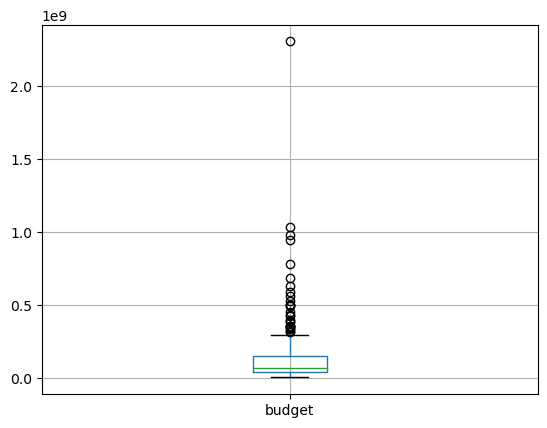

In [21]:
with_budget = data[data['budget']!=0]
print(with_budget['budget'].describe())
with_budget.boxplot('budget')

In [22]:
data[data['budget']>600000000]
data = data.drop(data[data['budget'] > 600000000].index)

In [23]:
with_budget = data[data['budget']!=0]
print(with_budget['budget'].describe())
with_budget.boxplot('budget')

count    3.250000e+02
mean     1.116026e+08
std      1.049340e+08
min      6.000000e+06
25%      4.507455e+07
50%      7.000000e+07
75%      1.395515e+08
max      5.901922e+08
Name: budget, dtype: float64


<Axes: >

In [24]:
print(data['ratings'].describe())
data.boxplot('ratings')

count    7451.000000
mean        6.501986
std         1.042234
min         1.000000
25%         6.000000
50%         6.600000
75%         7.200000
max         9.900000
Name: ratings, dtype: float64


<Axes: >

In [25]:
with_support = data[data['nonrefundable_support']!=0]
print(with_support['nonrefundable_support'].describe())
with_support.boxplot('nonrefundable_support')

count    3.160000e+02
mean     4.566324e+07
std      4.770533e+07
min      3.000000e+06
25%      2.500000e+07
50%      3.000000e+07
75%      4.000000e+07
max      4.000000e+08
Name: nonrefundable_support, dtype: float64


<Axes: >

In [26]:
data[data['nonrefundable_support']>250000000]
data = data.drop(data[data['nonrefundable_support'] > 250000000].index)
with_support = data[data['nonrefundable_support']!=0]
with_support.boxplot('nonrefundable_support')

<Axes: >

In [27]:
with_support = data[data['refundable_support']!=0]
print(with_support['refundable_support'].describe())
with_support.boxplot('refundable_support')

count    1.050000e+02
mean     3.094286e+07
std      2.445503e+07
min      3.500000e+06
25%      1.500000e+07
50%      2.500000e+07
75%      4.000000e+07
max      1.150000e+08
Name: refundable_support, dtype: float64


<Axes: >

- В столбцах 'budget' и 'nonrefundable_support' присутствуют аномальные значения (среди ненулевых), pни могут повлиять на результаты исследования, поэтому соит убрать некоторые из них. 


- В столбце 'refundable_support' можно оставить все как есть, т.к. аномальных значений не так много.


- Средний рейтинг: 6.6; Медиана: 6.5

In [28]:
new_data_size = data.shape[0]
print(new_data_size / old_data_size)

0.995056780227121


#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [29]:
data['year'] = data['show_start_date'].dt.year

- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

In [30]:
def get_genre(x):
    if x:
        tmp = x.split(",")
        return tmp[0]
    return ''

data['main_genre'] = data['genres'].apply(get_genre)

data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,main_genre
0,Открытый простор,221048915,2015-11-27 12:00:00,0,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",4,0.0,0.0,0.0,NaN,7.2,"боевик,драма,мелодрама",NaN,2015,боевик
1,Особо важное задание,111013716,2016-09-13 12:00:00,0,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,1,0.0,0.0,0.0,NaN,6.6,"драма,военный",NaN,2016,драма
2,Особо опасен,221038416,2016-10-10 12:00:00,0,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",4,0.0,0.0,0.0,NaN,6.8,"фантастика,боевик,триллер",NaN,2016,фантастика
3,Особо опасен,221026916,2016-06-10 12:00:00,0,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",4,0.0,0.0,0.0,NaN,6.8,"фантастика,боевик,триллер",NaN,2016,фантастика
4,Особо опасен,221030815,2015-07-29 12:00:00,0,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",4,0.0,0.0,0.0,NaN,6.8,"фантастика,боевик,триллер",NaN,2015,фантастика


In [31]:
def get_director(x):
    if x:
        tmp = x.split(",")
        return tmp[0]
    return ''
        
data['main_director'] = data['director'].apply(get_director)
data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,main_genre,main_director
0,Открытый простор,221048915,2015-11-27 12:00:00,0,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",4,0.0,0.0,0.0,NaN,7.2,"боевик,драма,мелодрама",NaN,2015,боевик,Кевин Костнер
1,Особо важное задание,111013716,2016-09-13 12:00:00,0,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,1,0.0,0.0,0.0,NaN,6.6,"драма,военный",NaN,2016,драма,Е.Матвеев
2,Особо опасен,221038416,2016-10-10 12:00:00,0,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",4,0.0,0.0,0.0,NaN,6.8,"фантастика,боевик,триллер",NaN,2016,фантастика,Тимур Бекмамбетов
3,Особо опасен,221026916,2016-06-10 12:00:00,0,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",4,0.0,0.0,0.0,NaN,6.8,"фантастика,боевик,триллер",NaN,2016,фантастика,Тимур Бекмамбетов
4,Особо опасен,221030815,2015-07-29 12:00:00,0,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",4,0.0,0.0,0.0,NaN,6.8,"фантастика,боевик,триллер",NaN,2015,фантастика,Тимур Бекмамбетов


- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [32]:
data['portion'] = data.apply(
    lambda row: (row['refundable_support']+row['nonrefundable_support'])/row['budget'] if row['budget']!=0 else 0,
    axis=1
)

### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

In [33]:
pivot_year = data.pivot_table(index='year', values='box_office', aggfunc=['count'])
pivot_year.columns = ['count']
#print(pivot_year)

pivot_total = data.pivot_table(index='year', values='title', aggfunc=['count'])
pivot_total.columns = ['count']
#print(pivot_total)

tmp2 = pivot_year['count']/pivot_total['count']
tmp2.plot()

<Axes: xlabel='year'>

Можно заметить, что с каждым годом все больше фильмов с информацией о прокате в кинотеатрах. Больше всего данных представлено в 2017 году.

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

In [34]:
data.plot(x='year', y='box_office', kind='scatter', alpha=0.05) 

<Axes: xlabel='year', ylabel='box_office'>

Ничего неизвестно о сборах до 2013 года. До 2018 года сумма сборов повышалась. Нельзя точно сказать, когда сумма была минимальной, т.к. отсутствуют некоторые значения.

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

In [35]:
pivot_data = data.pivot_table(index='year', values='box_office', aggfunc=['mean', 'median'])
pivot_data.columns = ['mean', 'median']
pivot_data.plot()

<Axes: xlabel='year'>

По графику точно можно заметить, что в данных присутствуют аномальные значения. Медиана для каждого года примерно на одном уровне.

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

In [36]:
tmp3 = data.query('year >= 2015 & year <= 2019')
tmp4= tmp3.pivot_table(index='age_restriction', values= 'box_office', aggfunc='median')
tmp4.plot(style='o')

<Axes: xlabel='age_restriction'>

По графику видно, что больше всего денег собрали фильмы с рейтингом 6+. Меньше всего у фильмов с рейтингом 0+. Фильмы с рейтингом 12+ тоже трудно назвать успешными. Это может быть связано с количеством определенных фильмов и их популярностью среди зрителей. 

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

In [37]:
data['total_support'] = data['refundable_support']+data['nonrefundable_support']
tmp = data.query('total_support!=0')
print(tmp['total_support'].corr(tmp['ratings']))
tmp.plot(x='total_support', y='ratings', kind='scatter', alpha=0.05) 

0.055969322137198775


<Axes: xlabel='total_support', ylabel='ratings'>

In [38]:
tmp = data.query('total_support!=0 and box_office!=0')
print(tmp['total_support'].corr(tmp['box_office']))
tmp.plot(x='total_support', y='box_office', kind='scatter', alpha=0.05) 

0.36988327607246885


<Axes: xlabel='total_support', ylabel='box_office'>

- Нет особой связи между количеством средств, предоставленных государством, и рейтингом.
- Связь между количеством средств, предоставленных государством, и сборами мала.

In [39]:
tmp = data.query('total_support!=0')
pivot_support = tmp.pivot_table(index='year', values=['total_support'], aggfunc='median')
pivot_support.columns = ['median']
pivot_data.plot()

<Axes: xlabel='year'>

Можно заметить, что до 2017 года государственная поддержка увеличивалась. Этот график схож с предыдущим (кассовые сборы по годам).

In [40]:
tmp = data.query('total_support!=0 and box_office!=0')
# if less than 1, movie succeeded
# otherwise loss
tmp['success'] = tmp['total_support'] / tmp['box_office']
print('total:', len(tmp['success']))
print('succeeded:', len(tmp[tmp['success']<1]))
print(len(tmp[tmp['success']<1]) / len(tmp['success']))

total: 322
succeeded: 112
0.34782608695652173


C:\Users\Dell\AppData\Local\Temp\ipykernel_16108\2374134769.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['success'] = tmp['total_support'] / tmp['box_office']


Можно сделать вывод, что большинство фильмов не окупились.

In [41]:
tmp2 = tmp.query('success < 1')
pivot_success = tmp2.pivot_table(index = 'main_genre', values = 'success', aggfunc='count')
pivot_success

,success
main_genre,
,1
биография,2
боевик,4
военный,4
детектив,1
драма,17
история,2
комедия,35
криминал,1


В основном окупились комедии и мультфильмы.

In [42]:
pivot_success = tmp2.pivot_table(index = 'main_director', values = 'success', aggfunc='count')
pivot_success.columns = ['count']
pivot_success[pivot_success['count']>1]

,count
main_director,
А.Аксененко,2
А.Богуславский,2
А.Волгин,2
А.Меликян,2
А.Пиманов,2
А.Цицилин,2
В.Ровенский,2
В.Тодоровский,2
Д.Дьяченко,4


Больше всех окупаемых фильмов у Д.Дьяченко и С.Андреасян...	

### Шаг 5. Напишите общий вывод

Цель: Исследовать фильмы, которые получили государственную поддержку. 
Ответить на вопросы:
- Пользуются ли  успехом. Какие наиболее популярны.

#### Заметки:

- Предоставленных данных с каждым годом все больше.


- Кассовые сборы незначительно менялись в течение нескольких лет.

#### Основные Выводы:

- В период с 2015 и 2019 года больше всего денег собрали фильм с возрастным ограничением 6+. Это может быть связано с количеством определенных фильмов и их популярностью среди зрителей. 


- Нельзя сказать, что количество предоставленных средств связано с конечным успехом фильма. 

    - Корреляция между денежной поддержкой и рейтингом: 0.05
    - Корреляция между денежной поддержкой и сборами: 0.36
   
   
- Большинство фильмов с гос. поддержкой не окупились. Доля окупившихся: 0.34


- В основном окупились комедии и мультфильмы. 


- Больше всех окупаемых фильмов у Д.Дьяченко и С.Андреасян. Это может быть связано с рекламной компанией или известностью режиссера.
